Getting Stock data of Tesla and Gamestop using yfinance

In [ ]:
import yfinance as yf
import pandas as pd

# Tesla
tesla = yf.Ticker("GME")
tesla_df = gamestop.history(period="5y").reset_index()
tesla_df.head()

# GameStop
gamestop = yf.Ticker("GME")
gme_df = gamestop.history(period="5y").reset_index()
gme_df.head()

In [ ]:
tesla_df.to_csv("tesla_stock.csv", index=False)

In [ ]:
gme_df.to_csv("gamestop_stock.csv", index=False)

Getting revenue data of Tesla and Gamestop using webscraping 

In [4]:
!pip install selenium


In [22]:
from selenium import webdriver

In [23]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options

# Setup Chrome options
options = Options()
options.add_argument("--headless")  # You can remove this line to see the browser open
options.add_argument("--disable-gpu")
options.add_argument("--no-sandbox")

# Launch ChromeDriver (no need to pass executable_path if it's in PATH)
driver = webdriver.Chrome(options=options)

# Open a simple webpage
driver.get("https://www.google.com")

# Print the title of the page
print("Page title is:", driver.title)

# Close the browser
driver.quit()


Page title is: Google


In [25]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [26]:
pip install beautifulsoup4

In [41]:
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import time

# Step 1: Set up headless Chrome
options = Options()
options.add_argument("--headless")
options.add_argument("--disable-gpu")
options.add_argument("--no-sandbox")

driver = webdriver.Chrome(options=options)

# Step 2: Open Macrotrends Tesla Revenue page
url1 = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
driver.get(url1)

time.sleep(5)  # Give JavaScript time to render

# Step 3: Get page source and close driver
html = driver.page_source
driver.quit()

# Step 4: Parse with BeautifulSoup
soup = BeautifulSoup(html, "html.parser")

# Step 5: Locate the correct table
tables = soup.find_all("table")
revenue_table = None

for table in tables:
    if "Tesla Quarterly Revenue" in table.text:
        revenue_table = table
        break

if revenue_table is None:
    raise Exception("❌ Revenue table not found.")

# Step 6: Extract data
data = []
for row in revenue_table.find("tbody").find_all("tr"):
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace("$", "").replace(",", "")
        if revenue:
            data.append([date, revenue])

# Step 7: Convert to DataFrame
df = pd.DataFrame(data, columns=["Date", "Revenue"])
df["Date"] = pd.to_datetime(df["Date"])
df["Revenue"] = pd.to_numeric(df["Revenue"])

# Step 8: Show output
print(" Tesla Revenue Data Preview:")
display(df.tail())

# (Optional) Save to CSV
df.to_csv("tesla_quarterly_revenue.csv", index=False)


 Tesla Revenue Data Preview:


,Date,Revenue
58,2010-09-30,31
59,2010-06-30,28
60,2010-03-31,21
61,2009-09-30,46
62,2009-06-30,27


In [42]:
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import time

# Step 1: Set up headless Chrome
options = Options()
options.add_argument("--headless")
options.add_argument("--disable-gpu")
options.add_argument("--no-sandbox")

driver = webdriver.Chrome(options=options)

# Step 2: Open Macrotrends Gamestop Revenue page
url2 = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

driver.get(url2)

time.sleep(5)  # Give JavaScript time to render

# Step 3: Get page source and close driver
html = driver.page_source
driver.quit()

# Step 4: Parse with BeautifulSoup
soup = BeautifulSoup(html, "html.parser")

# Step 5: Locate the correct table
tables = soup.find_all("table")
revenue_table = None

for table in tables:
    if "GameStop Quarterly Revenue" in table.text:
        revenue_table = table
        break

if revenue_table is None:
    raise Exception(" Revenue table not found.")

# Step 6: Extract data
data = []
for row in revenue_table.find("tbody").find_all("tr"):
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace("$", "").replace(",", "")
        if revenue:
            data.append([date, revenue])

# Step 7: Convert to DataFrame
df = pd.DataFrame(data, columns=["Date", "Revenue"])
df["Date"] = pd.to_datetime(df["Date"])
df["Revenue"] = pd.to_numeric(df["Revenue"])

# Step 8: Show output
print(" Gamestop Revenue Data Preview:")
display(df.tail())

# (Optional) Save to CSV
df.to_csv("gamestop_quarterly_revenue.csv", index=False)


 Gamestop Revenue Data Preview:


,Date,Revenue
61,2010-01-31,3524
62,2009-10-31,1835
63,2009-07-31,1739
64,2009-04-30,1981
65,2009-01-31,3492


In [8]:
import pandas as pd

# Tesla
tesla_stock = pd.read_csv("tesla_stock.csv", parse_dates=["Date"])
tesla_revenue = pd.read_csv("tesla_quarterly_revenue.csv", parse_dates=["Date"])

# GameStop
gamestop_stock = pd.read_csv("gamestop_stock.csv", parse_dates=["Date"])
gamestop_revenue = pd.read_csv("gamestop_quarterly_revenue.csv", parse_dates=["Date"])


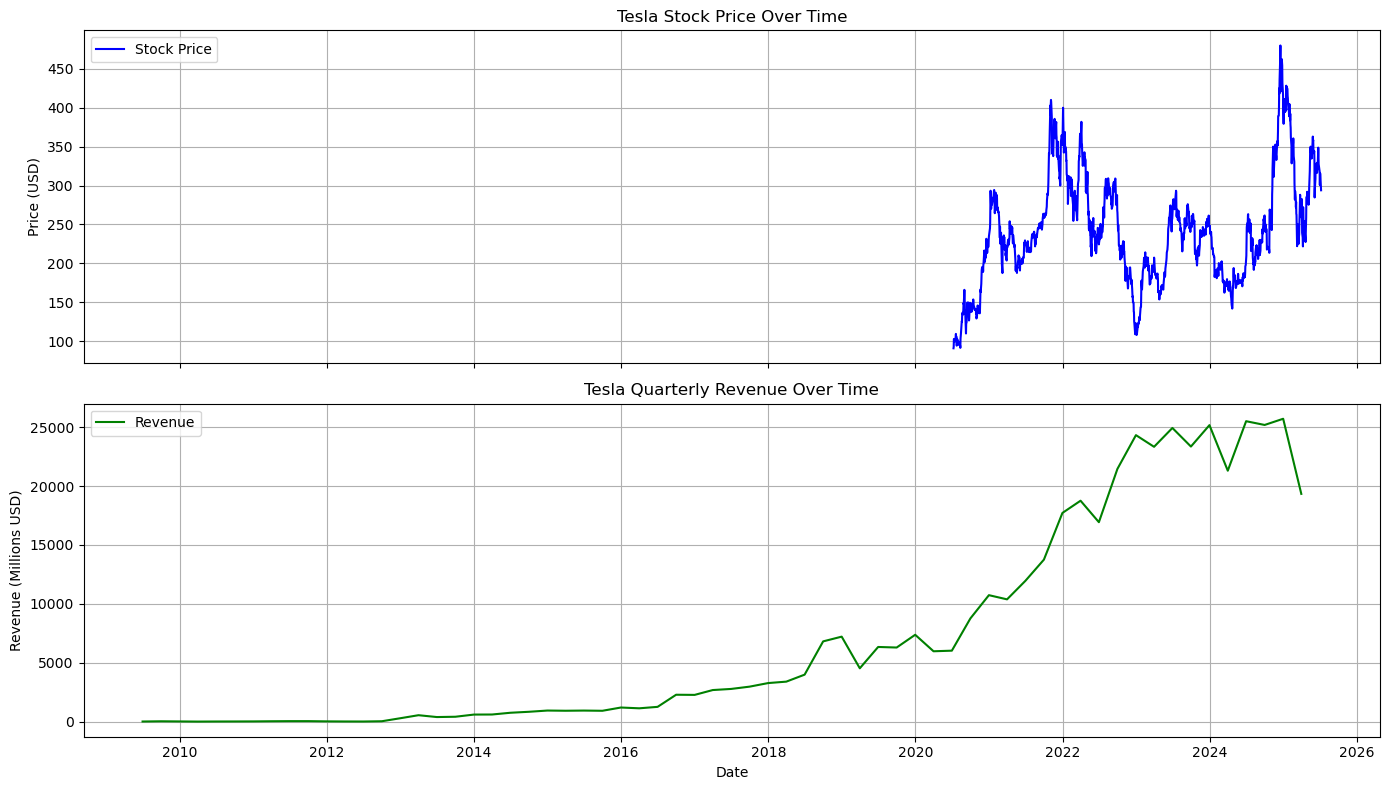

In [11]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

# Stock Price
ax[0].plot(tesla_stock["Date"], tesla_stock["Close"], label="Stock Price", color="blue")
ax[0].set_title("Tesla Stock Price Over Time")
ax[0].set_ylabel("Price (USD)")
ax[0].legend()
ax[0].grid(True)

# Revenue
ax[1].plot(tesla_revenue["Date"], tesla_revenue["Revenue"], label="Revenue", color="green")
ax[1].set_title("Tesla Quarterly Revenue Over Time")
ax[1].set_ylabel("Revenue (Millions USD)")
ax[1].set_xlabel("Date")
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()


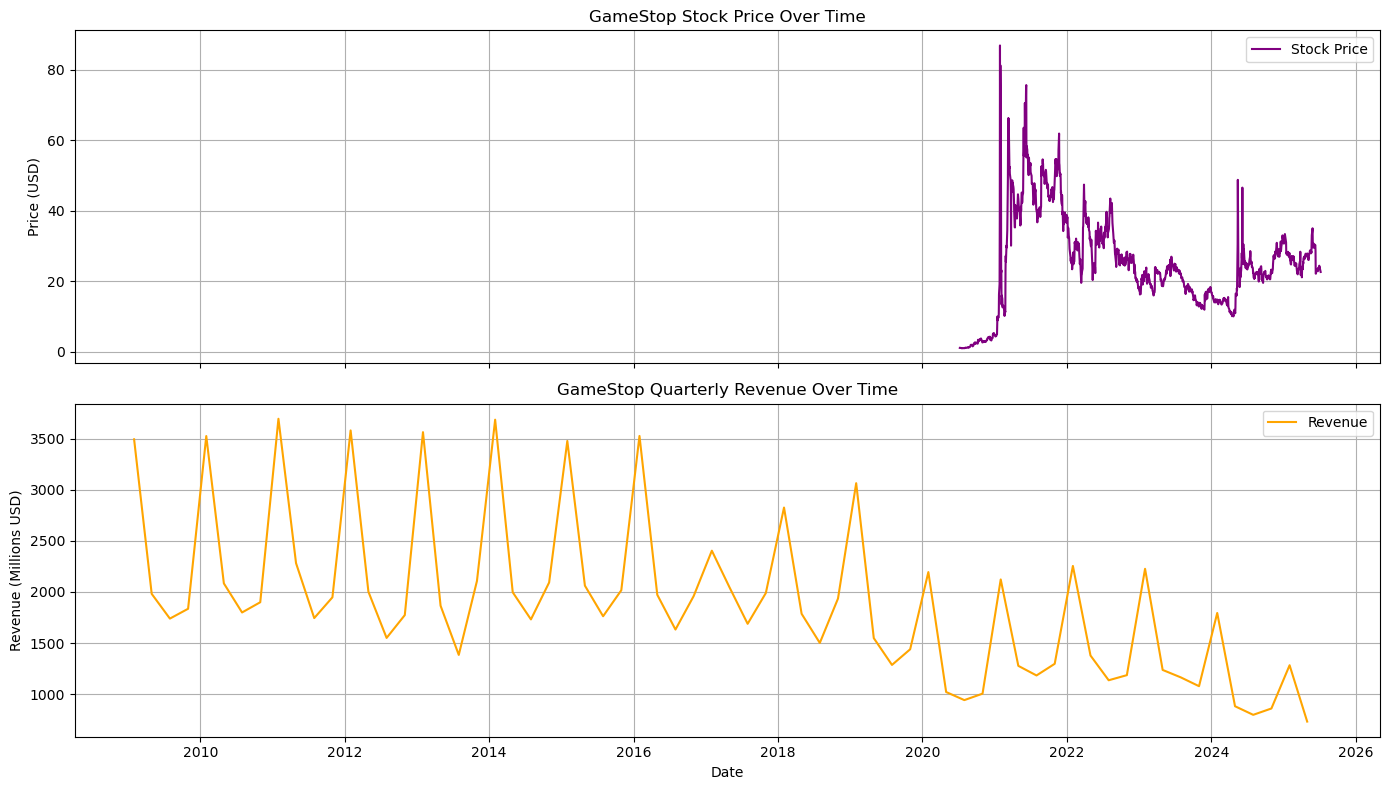

In [12]:
fig, ax = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

# Stock Price
ax[0].plot(gamestop_stock["Date"], gamestop_stock["Close"], label="Stock Price", color="purple")
ax[0].set_title("GameStop Stock Price Over Time")
ax[0].set_ylabel("Price (USD)")
ax[0].legend()
ax[0].grid(True)

# Revenue
ax[1].plot(gamestop_revenue["Date"], gamestop_revenue["Revenue"], label="Revenue", color="orange")
ax[1].set_title("GameStop Quarterly Revenue Over Time")
ax[1].set_ylabel("Revenue (Millions USD)")
ax[1].set_xlabel("Date")
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()


C:\Users\Sowmiya\AppData\Local\Temp\ipykernel_19304\14021389.py:37: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
C:\Users\Sowmiya\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


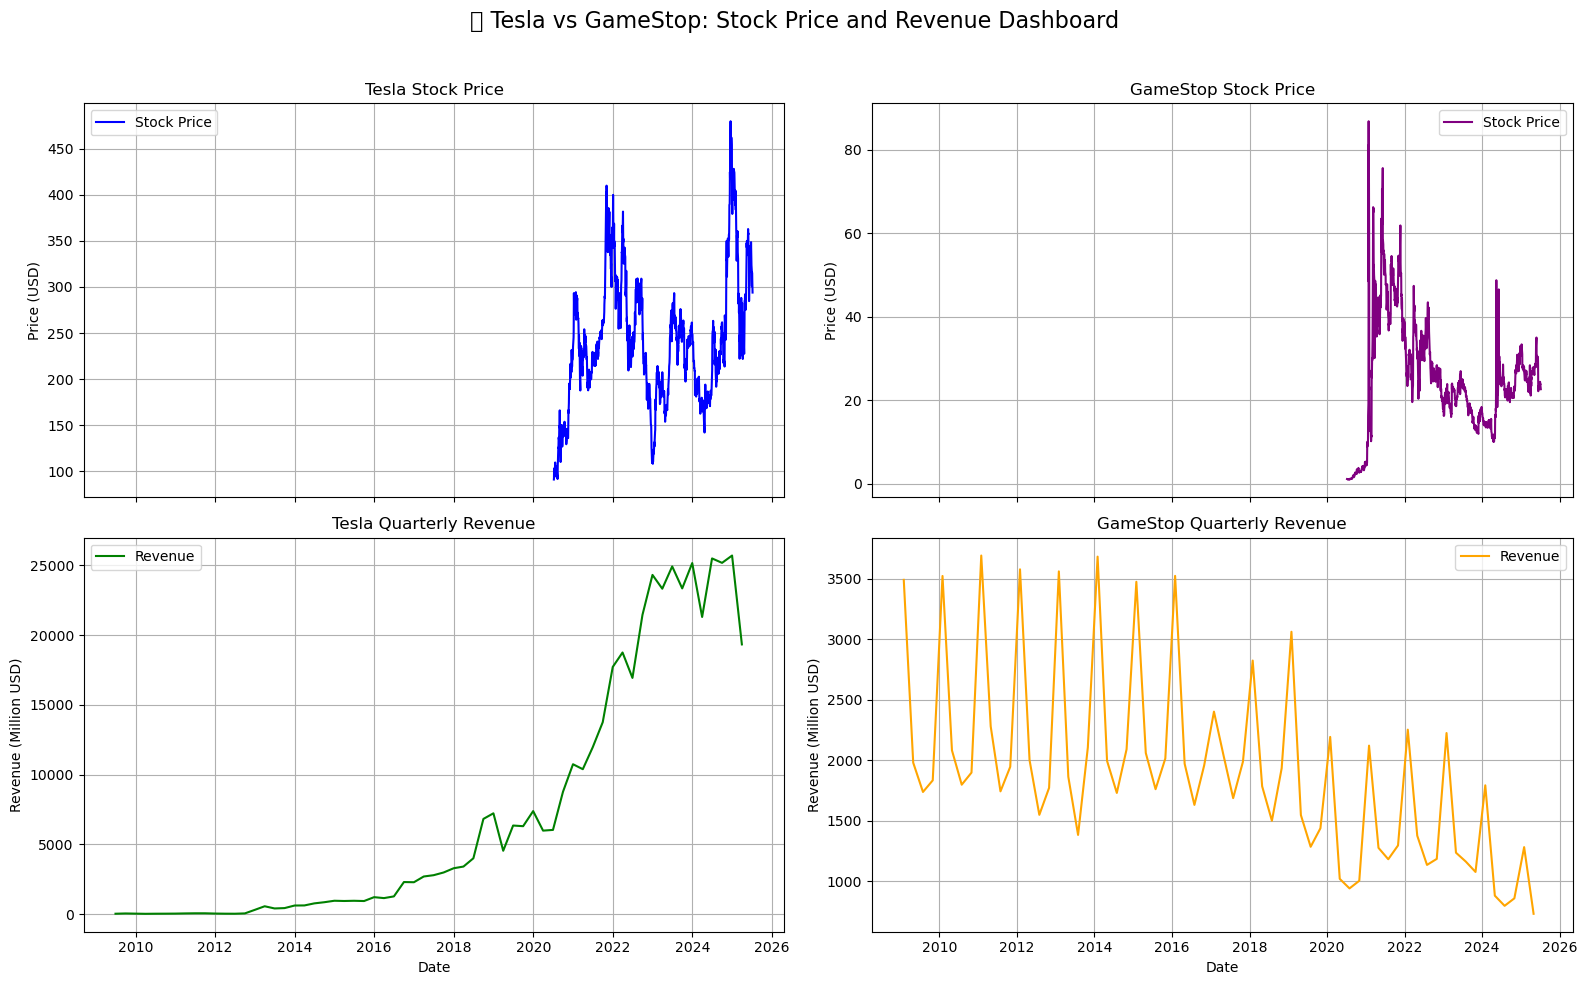

In [13]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(16, 10), sharex='col')

# --- Tesla Stock Price ---
axs[0, 0].plot(tesla_stock["Date"], tesla_stock["Close"], color="blue", label="Stock Price")
axs[0, 0].set_title("Tesla Stock Price")
axs[0, 0].set_ylabel("Price (USD)")
axs[0, 0].legend()
axs[0, 0].grid(True)

# --- Tesla Revenue ---
axs[1, 0].plot(tesla_revenue["Date"], tesla_revenue["Revenue"], color="green", label="Revenue")
axs[1, 0].set_title("Tesla Quarterly Revenue")
axs[1, 0].set_ylabel("Revenue (Million USD)")
axs[1, 0].set_xlabel("Date")
axs[1, 0].legend()
axs[1, 0].grid(True)

# --- GameStop Stock Price ---
axs[0, 1].plot(gamestop_stock["Date"], gamestop_stock["Close"], color="purple", label="Stock Price")
axs[0, 1].set_title("GameStop Stock Price")
axs[0, 1].set_ylabel("Price (USD)")
axs[0, 1].legend()
axs[0, 1].grid(True)

# --- GameStop Revenue ---
axs[1, 1].plot(gamestop_revenue["Date"], gamestop_revenue["Revenue"], color="orange", label="Revenue")
axs[1, 1].set_title("GameStop Quarterly Revenue")
axs[1, 1].set_ylabel("Revenue (Million USD)")
axs[1, 1].set_xlabel("Date")
axs[1, 1].legend()
axs[1, 1].grid(True)

# Overall layout
fig.suptitle("📊 Tesla vs GameStop: Stock Price and Revenue Dashboard", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Insights:

Tesla (TSLA):

- Tesla’s revenue has steadily increased over time, especially after 2020.

- The stock price also grew significantly, especially during the same period.

- This shows a positive correlation — when Tesla earns more money, its stock value tends to go up.

- The company shows strong financial performance and market trust.

GameStop (GME):

- GameStop’s revenue has remained flat or declined slightly in recent years.

- However, its stock price showed extreme spikes, especially in 2021 — not because of revenue, but due to social media and retail investor hype.

- There is no clear link between GameStop’s earnings and its stock price movement.

Final Summary:

Tesla: Revenue growth + Stock growth → Stable for long-term

GameStop: Revenue + Unpredictable stock → High risk, speculative